In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# Biblioteca para fazer a PADRONIZAÇÃO
from sklearn.preprocessing import StandardScaler

# Biblioteca para fazer a NORMALIZAÇÃO
from sklearn.preprocessing import MinMaxScaler

# Bilioteca para separação de dados em treino e teste
from sklearn.model_selection import train_test_split

# Biblioteca para calcular a acuracia do modelo
from sklearn.metrics import accuracy_score

# Algoritmo KNN
from sklearn.neighbors import KNeighborsClassifier

# Algoritmo SVM
from sklearn import svm

In [2]:
df_original = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",sep=',')

In [3]:
df_original.columns=['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']
df_original.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [4]:
df_original.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


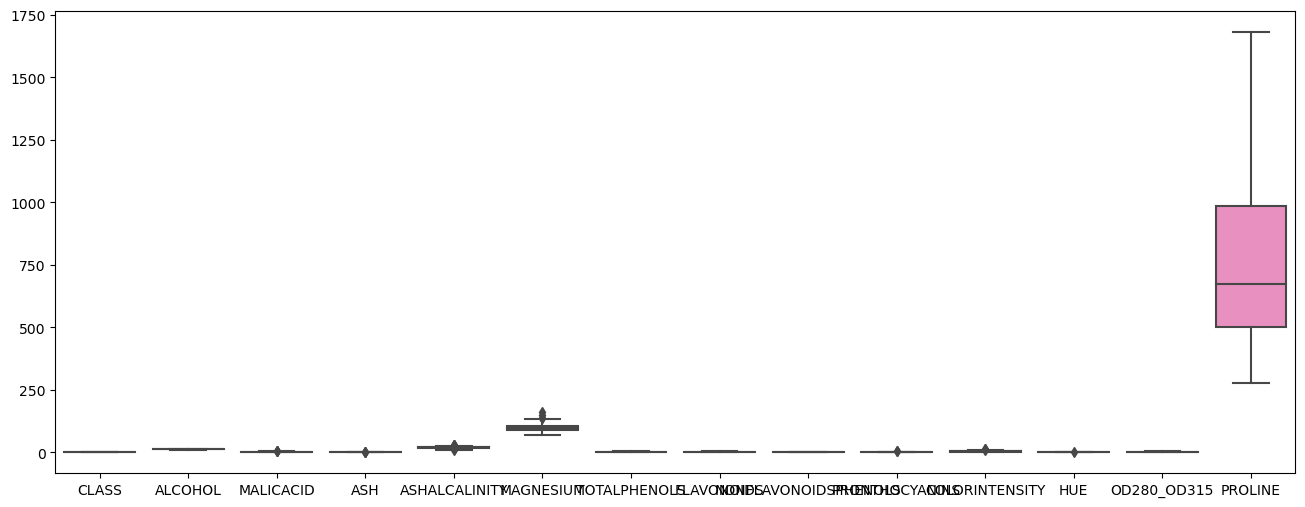

In [5]:
plt.figure(figsize=(16,6))
ax=sns.boxplot(data = df_original)

In [6]:
#Primeiro passo cria um objeto para chamar o metodo de padronização 'StandartScale()', onde padroniza os dados em media 0 e desvio padrao 1
obj_padronizacao = StandardScaler().fit(df_original)

#Segundo passo chama o metodo para fazer a transformação
df_padronizado = obj_padronizacao.transform(df_original)

df_padronizado=pd.DataFrame(df_padronizado)
df_padronizado.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']
df_padronizado.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,-1.222468,0.255824,-0.501624,-0.824485,-2.500110,0.029180,0.572666,0.739636,-0.823139,-0.538575,-0.291130,0.407100,1.131698,0.971052
1,-1.222468,0.206229,0.018020,1.107690,-0.275639,0.099932,0.812784,1.221645,-0.501337,2.145975,0.269729,0.319567,0.804579,1.400998
2,-1.222468,1.706501,-0.349315,0.487935,-0.816726,0.948953,2.493609,1.472691,-0.984039,1.040572,1.184362,-0.424458,1.202811,2.340509
3,-1.222468,0.305420,0.224086,1.836812,0.445811,1.302712,0.812784,0.669343,0.222716,0.408913,-0.317016,0.363334,0.463238,-0.032154
4,-1.222468,1.495719,-0.519543,0.305655,-1.297693,0.878201,1.565153,1.372273,-0.179536,0.672104,0.731360,0.407100,0.349457,2.244965


In [7]:
df_padronizado.describe()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
count,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02,1.770000e+02
mean,-8.028731e-17,-5.218675e-16,2.810056e-16,-3.813647e-16,-2.408619e-16,-8.028731e-17,-2.810056e-16,1.605746e-16,-6.021549e-16,-4.014366e-17,1.806465e-16,6.021549e-16,7.225858e-16,1.605746e-16
std,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00,1.002837e+00
min,-1.222468e+00,-2.434746e+00,-1.433400e+00,-3.668064e+00,-2.680472e+00,-2.093373e+00,-2.100648e+00,-1.690491e+00,-1.868993e+00,-2.065084e+00,-1.628565e+00,-2.087573e+00,-1.897707e+00,-1.487599e+00
25%,-1.222468e+00,-7.856866e-01,-6.628933e-01,-5.692924e-01,-6.964846e-01,-8.198411e-01,-8.840502e-01,-8.268924e-01,-7.426883e-01,-5.912136e-01,-7.959038e-01,-7.745875e-01,-9.590184e-01,-7.805774e-01
50%,7.320166e-02,6.984037e-02,-4.209899e-01,-2.245039e-02,-5.094986e-03,-1.123234e-01,9.242960e-02,1.069996e-01,-1.795360e-01,-6.483128e-02,-1.617011e-01,1.320404e-02,2.498992e-01,-2.327949e-01
75%,1.368871e+00,8.385748e-01,6.810145e-01,7.066723e-01,5.961134e-01,5.244425e-01,8.127835e-01,8.400546e-01,6.249672e-01,6.370119e-01,4.940731e-01,7.134631e-01,8.045791e-01,7.640417e-01
max,1.368871e+00,2.276852e+00,3.100048e+00,3.149233e+00,3.151249e+00,4.415790e+00,2.541633e+00,3.069345e+00,2.394874e+00,3.497023e+00,3.427800e+00,3.295669e+00,1.985052e+00,2.977465e+00


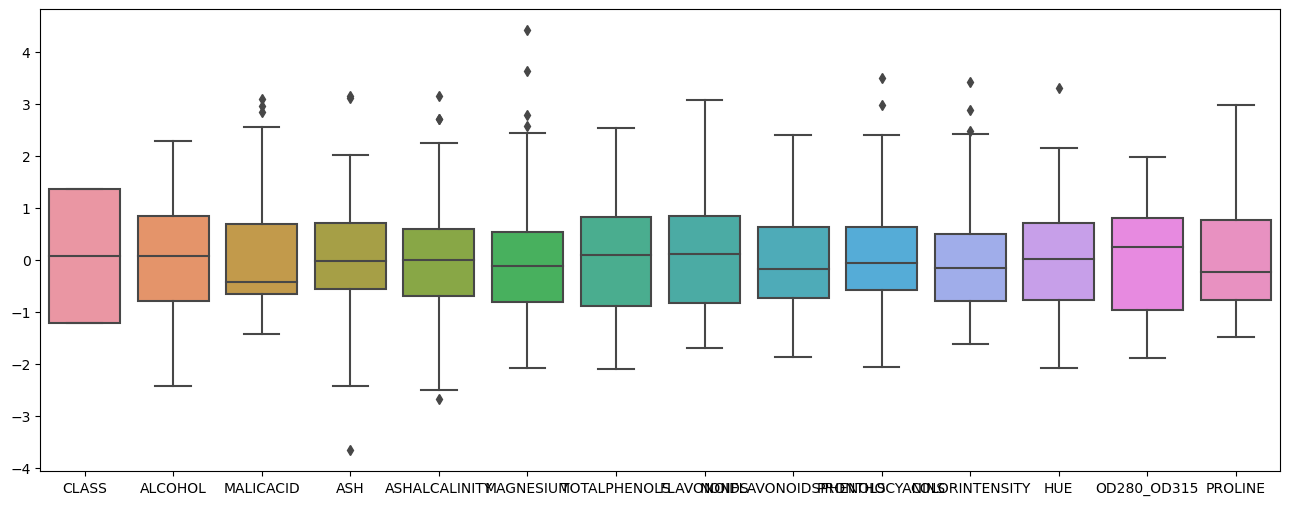

In [8]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_padronizado) #plot com dados já padronizados

In [9]:
#Agora para a parte de normalização dos dados utiliza-se o metodo 'MinMaxScaler()'

obj_normalizacao = MinMaxScaler().fit(df_original)
df_normalizado = obj_normalizacao.transform(df_original)

df_normalizado = pd.DataFrame(df_normalizado)
df_normalizado.columns = ['CLASS','ALCOHOL','MALICACID','ASH','ASHALCALINITY','MAGNESIUM','TOTALPHENOLS','FLAVONOIDS',
                      'NONFLAVONOIDSPHENOLS','PRONTHOCYANINS','COLORINTENSITY','HUE','OD280_OD315','PROLINE']
df_normalizado.head()

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,0.0,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
1,0.0,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
2,0.0,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
3,0.0,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
4,0.0,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949


In [10]:
df_normalizado.describe() #a normalizacao deixa a variavel de min e max entre 0 e 1

,CLASS,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.471751,0.516756,0.316183,0.538053,0.459637,0.321604,0.452503,0.355157,0.438333,0.371277,0.322082,0.387791,0.488752,0.333164
std,0.386996,0.212844,0.221208,0.147102,0.171962,0.154065,0.216022,0.210687,0.235194,0.180298,0.198332,0.186289,0.258279,0.224596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.350000,0.169960,0.454545,0.340206,0.195652,0.262069,0.181435,0.264151,0.264984,0.164676,0.243902,0.241758,0.158345
50%,0.500000,0.531579,0.223320,0.534759,0.458763,0.304348,0.472414,0.377637,0.396226,0.359621,0.290102,0.390244,0.553114,0.281027
75%,1.000000,0.694737,0.466403,0.641711,0.561856,0.402174,0.627586,0.531646,0.584906,0.485804,0.419795,0.520325,0.695971,0.504280
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


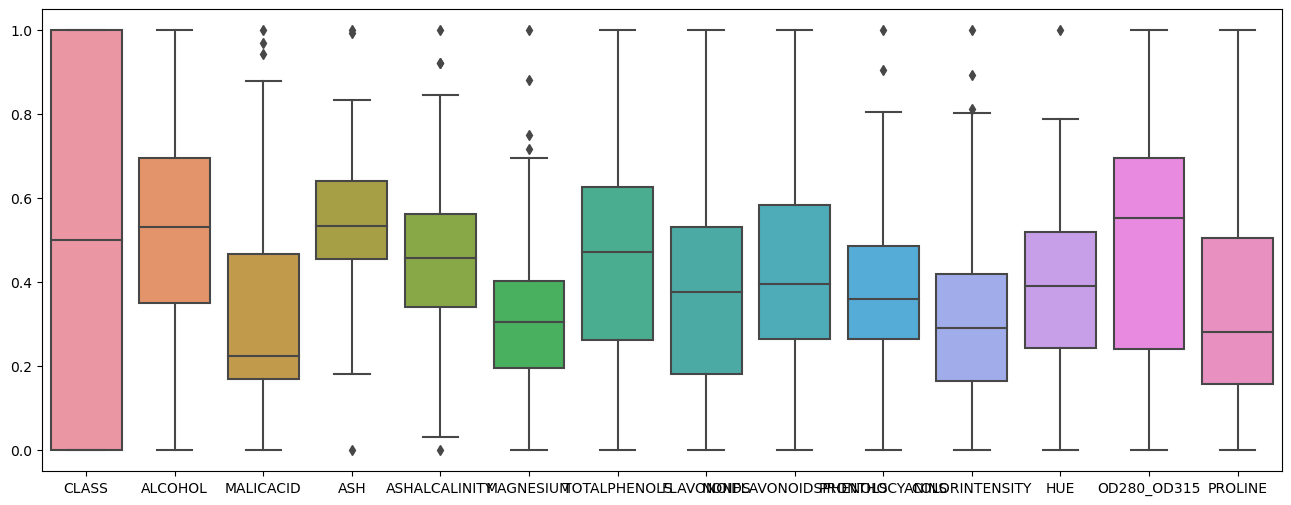

In [11]:
plt.figure(figsize=(16,6))
ax = sns.boxplot(data = df_normalizado)

In [12]:
#O passo agora é criar atraves de um algoritimo o modelo predititivo com as variaveis preditoras originais excluindo a variavel target 'CLASS'
df_preditoras = df_original.drop('CLASS',axis=1)
df_preditoras.head()

,ALCOHOL,MALICACID,ASH,ASHALCALINITY,MAGNESIUM,TOTALPHENOLS,FLAVONOIDS,NONFLAVONOIDSPHENOLS,PRONTHOCYANINS,COLORINTENSITY,HUE,OD280_OD315,PROLINE
0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [13]:
#E aqui crio um DtaFrame para a variavel target 'CLASS'
df_target = df_original['CLASS']
df_target.head()


0    1
1    1
2    1
3    1
4    1
Name: CLASS, dtype: int64

In [14]:
# aqui crio o treino e teste das variaveis originais

X_train,X_test,Y_train,Y_test = train_test_split(df_preditoras,df_target, test_size = 0.3, random_state = 10)

knn = KNeighborsClassifier()

knn.fit(X_train,Y_train)

resultado = knn.predict(X_test)

score = accuracy_score(Y_test,resultado)

score # este score mostra a acuracia do resultado gerado ,ou seja , de 100 ele acerta 67% ,lembrando que aqui os dados NÃO estão normalizados

0.6666666666666666

In [15]:
#modelo para df_normalizado
X_train,X_test,Y_train,Y_test = train_test_split(df_normalizado,df_target,test_size = 0.3,random_state=10)

knn = KNeighborsClassifier()

knn.fit(X_train,Y_train)

resultado = knn.predict(X_test)

score = accuracy_score(Y_test,resultado)

score # aqui ve-se a importancia de normalizar os dados para o modelo preditivo. Evita a tendenciosidade dos dados.


1.0

In [17]:
#modelo para o df_padronizado

X_train,X_test,Y_train,Y_test = train_test_split(df_padronizado, df_target,test_size = 0.3,random_state = 10)

knn = KNeighborsClassifier()

knn.fit(X_train,Y_train)

resultado = knn.predict(X_test)

score = accuracy_score(Y_test,resultado)

score

0.9259259259259259